In [1]:
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.chrome.options import Options
import pandas as pd
import numpy as np
import time
from bs4 import BeautifulSoup
from webdriver_manager.chrome import ChromeDriverManager

In [18]:
jobs = []
salaries = []
descriprions = []

In [41]:
jobs = []
salaries = []
descriprions = []

options = Options()
path = "C:\Program Files\Google\Chrome\Application\chrome.exe"
driver = webdriver.Chrome()

for i in range(1,40):
    driver.get(f"https://kemerovo.hh.ru/search/vacancy?from=suggest_post&ored_clusters=true&search_field=name&search_field=company_name&search_field=description&text=%D0%9F%D1%80%D0%BE%D0%B3%D1%80%D0%B0%D0%BC%D0%BC%D0%B8%D1%81%D1%82&enable_snippets=false&L_save_area=true&page={i}")

    content = driver.page_source

    soup = BeautifulSoup(content)

    for card in  soup.findAll("div", attrs={"data-qa":"vacancy-serp__vacancy vacancy-serp__vacancy_standard"}):
        job = card.find("span", attrs={"data-qa":"serp-item__title"})
        salary = card.find("span", attrs={"data-qa":"vacancy-serp__vacancy-compensation"})
        descriprion = card.find("div", attrs={"class":"vacancy-serp-item__info"})

        if job is not None:
          jobs.append(job.text)
        else:
          jobs.append(None)

        if salary is not None:
          salaries.append(salary.text)
        else:
          salaries.append(None)

        if descriprion is not None:
          descriprions.append(descriprion.text)
        else:
          descriprions.append(None)
    


print(jobs)
print(salaries)
print(descriprions)

# driver.quit()

['Веб-разработчик', 'Программист Oracle', 'Программист', 'Программист C#', 'Программист / разработчик Bitrix', 'Инженер-программист', 'Программист микроконтроллеров', 'Программист (Powerbuilder)', 'Программист-разработчик', 'Программист-разработчик', 'Инженер-программист', 'Программист Delphi', 'Fullstack программист - разработчик', 'Программист-разработчик', 'Инженер-программист', 'Программист С', 'Инженер-программист', 'Java-разработчик', 'PHP - программист', 'Инженер-программист', 'Web-программист', 'Инженер-программист', 'Программист 1С', 'Программист микроконтроллеров', 'Инженер-программист', 'Fullstack Developer', 'Программист С++', 'Инженер-программист', 'Инженер-программист', 'Стажер-программист C#', 'Инженер-программист микроконтроллеров', 'Стажер-программист C#', 'Инженер-программист', 'Инженер-программист', 'Программист С++', 'Младший программист-моделист', 'Инженер-программист', 'Web-программист', '.NET разработчик', 'Frontend-разработчик', 'Java-разработчик', 'Программист 

In [42]:
def cl(s:str):
    if s:
        return s.replace("от ","").replace("\u202f","").replace(" ₽","")
salaries = list(map(cl,salaries))

In [43]:
df = pd.DataFrame({"job":jobs,"salary":salaries,"descriprion":descriprions})
df.head()

,job,salary,descriprion
0,Веб-разработчик,None,None
1,Программист Oracle,None,None
2,Программист,None,None
3,Программист C#,None,None
4,Программист / разработчик Bitrix,None,None


In [44]:
df.to_csv("kem_hh_ru.csv", index=False, encoding="utf-8")

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot  as plt
%matplotlib inline

from numpy import nan



In [2]:
df = pd.read_csv('kem_hh_ru.csv', sep=',')
df.head()

,job,salary,descriprion
0,Веб-разработчик,NaN,NaN
1,Программист Oracle,NaN,NaN
2,Программист,NaN,NaN
3,Программист C#,NaN,NaN
4,Программист / разработчик Bitrix,NaN,NaN


In [3]:
df.drop_duplicates()

aaa = {"SQL":['sql'],
       "1C":['1с', '1c','1 с', '1 c'],
       "Java":['java'],
       "C++":['c++','с++','c ++','с ++'],
       "C#":['c#','с#','c #','с #'],
       "GO":["go"],
       "PHP":['php',"рнр"],
       "Python":['python']}

for i, row in df.iterrows():
    job = row['job']
    description = row['descriprion']
    for k in list(aaa.keys()):
      if any(keyword in job.lower() for keyword in aaa[k]):
          df.at[i, 'job'] = k
    
df.to_csv("kem_hh_ru2.csv", index=False, encoding="utf-8")

In [4]:
top_jobs = df['job'].value_counts().head(n = 10)
top_jobs

job
1C                     311
Java                    89
PHP                     68
C#                      41
C++                     40
Python                  37
GO                      32
Инженер-программист     30
SQL                     22
Программист             19
Name: count, dtype: int64

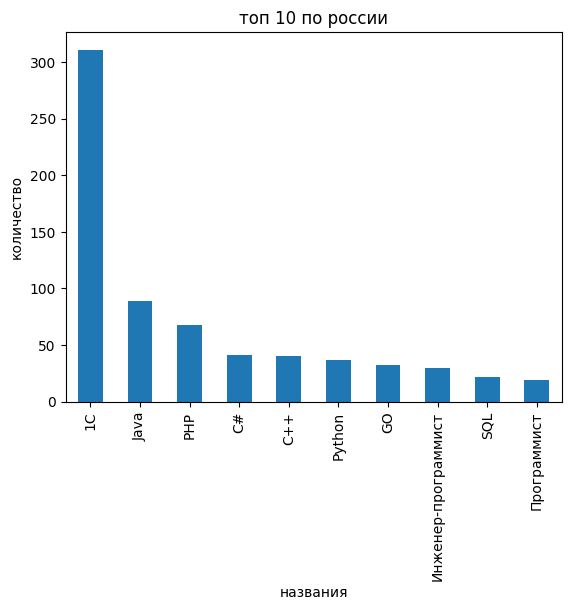

In [5]:
top_jobs.plot(kind='bar')
plt.xlabel('названия')
plt.ylabel('количество')
plt.title('топ 10 по россии')
plt.show()

In [8]:
jobs = []
salaries = []
descriprions = []

options = Options()
path = "C:\Program Files\Google\Chrome\Application\chrome.exe"
driver = webdriver.Chrome()

for i in range(1,4):
    driver.get(f"https://kemerovo.hh.ru/search/vacancy?from=suggest_post&ored_clusters=true&search_field=name&search_field=company_name&search_field=description&text=%D0%9F%D1%80%D0%BE%D0%B3%D1%80%D0%B0%D0%BC%D0%BC%D0%B8%D1%81%D1%82&enable_snippets=false&L_save_area=true&page={i}")

    content = driver.page_source

    soup = BeautifulSoup(content)

    for card in  soup.findAll("div", attrs={"data-qa":"vacancy-serp__vacancy vacancy-serp__vacancy_standard"}):
        job = card.find("span", attrs={"data-qa":"serp-item__title"})
        salary = card.find("span", attrs={"data-qa":"vacancy-serp__vacancy-compensation"})
        descriprion = card.find("div", attrs={"class":"vacancy-serp-item__info"})

        if job is not None:
          jobs.append(job.text)
        else:
          jobs.append(None)

        if salary is not None:
          salaries.append(salary.text)
        else:
          salaries.append(None)

        if descriprion is not None:
          descriprions.append(descriprion.text)
        else:
          descriprions.append(None)
          
def cl(s:str):
    if s:
        return s.replace("от ","").replace("\u202f","").replace(" ₽","")
salaries = list(map(cl,salaries))

df = pd.DataFrame({"job":jobs,"salary":salaries,"descriprion":descriprions})

df.to_csv("hh_ru2.csv", index=False, encoding="utf-8")

In [11]:
df = pd.read_csv('hh_ru2.csv', sep=',')

df.drop_duplicates()

aaa = {"SQL":['sql'],
       "1C":['1с', '1c','1 с', '1 c'],
       "Java":['java'],
       "C++":['c++','с++','c ++','с ++'],
       "C#":['c#','с#','c #','с #'],
       "GO":["go"],
       "PHP":['php',"рнр"],
       "Python":['python']}

for i, row in df.iterrows():
    job = row['job']
    description = row['descriprion']
    for k in list(aaa.keys()):
      if any(keyword in job.lower() for keyword in aaa[k]):
          df.at[i, 'job'] = k
    
df.to_csv("kem_hh_ru2.csv", index=False, encoding="utf-8")

top_jobs = df['job'].value_counts().head(n = 10)



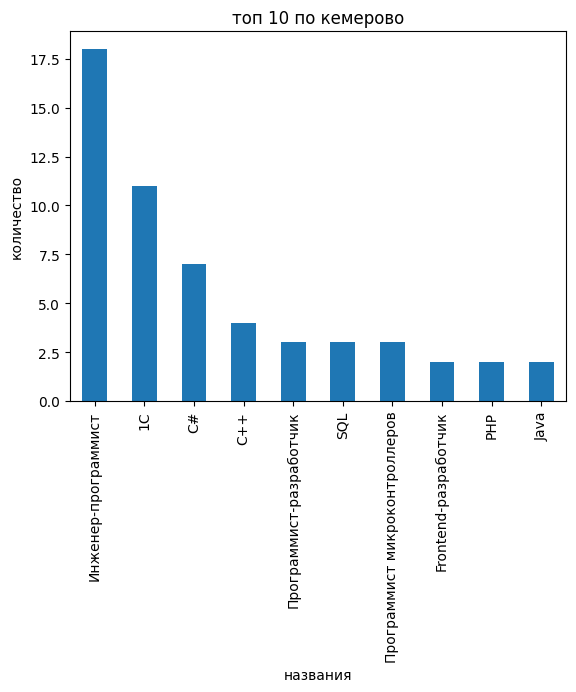

In [12]:
top_jobs.plot(kind='bar')
plt.xlabel('названия')
plt.ylabel('количество')
plt.title('топ 10 по кемерово')
plt.show()

In [3]:
import time

names = []
countrys = []
janrs = []

options = Options()
path = "C:\Program Files\Google\Chrome\Application\chrome.exe"
driver = webdriver.Chrome()

for i in range(0,5 + 1):
    driver.get(f"https://www.kinopoisk.ru/lists/movies/top250/?utm_referrer=www.kinopoisk.ru&page={i}")

    content = driver.page_source

    soup = BeautifulSoup(content)

    for card in  soup.findAll("div", attrs={"class":"styles_root__ti07r"}):
        name = card.find("span", attrs={"data-tid":"4502216a"})
        country = card.find("div", attrs={"data-tid":"31fba632"})
        # janr = card.find("div", attrs={"class":"vacancy-serp-item__info"})

        if name is not None:
          names.append(name.text)
        else:
          names.append(None)

        if country is not None:
          countrys.append(country.text)
        else:
          countrys.append(None)

        # if janr is not None:
        #   janrs.append(janr.text)
        # else:
        #   janrs.append(None)
        


web2 = "https://ru.kinorium.com/collections/imdb/233/?order=sequence&page=1&perpage=50&show_viewed=1"

names2 = []
countrys2 = []
janrs2 = []

for i in range(0,5 + 1):
    driver.get(f"https://ru.kinorium.com/collections/imdb/233/?order=sequence&page={i}&perpage=50&show_viewed=1")

    content = driver.page_source

    soup = BeautifulSoup(content)

    for card in  soup.findAll("div", attrs={"class":"filmList__item-content"}):
        name = card.find("span", attrs={"class":"title"})
        country = card.find("span", attrs={"class":"filmList__extra-info-director"})
        janr = card.find("p", attrs={"class":"filmList__extra-info"})

        if name is not None:
          names2.append(name.text)
        else:
          names2.append(None)

        if country is not None:
          countrys2.append(country.text)
        else:
          countrys2.append(None)

        if janr is not None:
          janrs2.append(janr.text)
        else:
          janrs2.append(None)
        




['Побег из Шоушенка', 'Крёстный отец', 'Тёмный рыцарь', 'Крёстный отец\xa02', '12\xa0разгневанных мужчин', 'Список Шиндлера', 'Властелин колец: Возвращение короля', 'Криминальное чтиво', 'Властелин колец: Братство Кольца', 'Хороший, плохой, злой', 'Форрест Гамп', 'Властелин колец: Две крепости', 'Бойцовский клуб', 'Начало', 'Звёздные войны: Эпизод\xa05 – Империя наносит ответный удар', 'Матрица', 'Славные парни', 'Пролетая над гнездом кукушки', 'Семь', 'Интерстеллар', 'Эта замечательная жизнь', 'Семь самураев', 'Дюна: Часть вторая', 'Молчание ягнят', 'Спасти рядового Райана', 'Город бога', 'Жизнь прекрасна', 'Зелёная миля', 'Терминатор\xa02: Судный день', 'Звёздные войны: Эпизод\xa04 – Новая надежда', 'Назад\xa0в будущее', 'Унесенные призраками', 'Пианист', 'Паразиты', 'Психо', 'Человек-паук: Паутина Вселенных', 'Гладиатор', 'Король Лев', 'Леон', 'Отступники', 'Американская история\xa0X', 'Одержимость', 'Престиж', 'Могила светлячков', 'Харакири', 'Подозрительные лица', 'Касабланка', '1

In [6]:
print(names2)
print(countrys2)
print(janrs2)
print(len(names2))
print(len(countrys2))
print(len(janrs2))

['Побег из Шоушенка', 'Крёстный отец', 'Тёмный рыцарь', 'Крёстный отец\xa02', '12\xa0разгневанных мужчин', 'Список Шиндлера', 'Властелин колец: Возвращение короля', 'Криминальное чтиво', 'Властелин колец: Братство Кольца', 'Хороший, плохой, злой', 'Форрест Гамп', 'Властелин колец: Две крепости', 'Бойцовский клуб', 'Начало', 'Звёздные войны: Эпизод\xa05 – Империя наносит ответный удар', 'Матрица', 'Славные парни', 'Пролетая над гнездом кукушки', 'Семь', 'Интерстеллар', 'Эта замечательная жизнь', 'Семь самураев', 'Дюна: Часть вторая', 'Молчание ягнят', 'Спасти рядового Райана', 'Город бога', 'Жизнь прекрасна', 'Зелёная миля', 'Терминатор\xa02: Судный день', 'Звёздные войны: Эпизод\xa04 – Новая надежда', 'Назад\xa0в будущее', 'Унесенные призраками', 'Пианист', 'Паразиты', 'Психо', 'Человек-паук: Паутина Вселенных', 'Гладиатор', 'Король Лев', 'Леон', 'Отступники', 'Американская история\xa0X', 'Одержимость', 'Престиж', 'Могила светлячков', 'Харакири', 'Подозрительные лица', 'Касабланка', '1

In [20]:
def cl(s:str):
  if s:
    return s.split()[0].replace(',','')

def yo(s:str):
  if s:
    return s.replace('ё','е').replace('\xa0',' ')

countrys2 = list(map(cl,countrys2))
janrs2 = list(map(cl,janrs2))
names2 = list(map(yo,names2))


In [21]:
print(names2)
print(countrys2)
print(janrs2)
print(len(names2))
print(len(countrys2))
print(len(janrs2))

['Побег из Шоушенка', 'Крестный отец', 'Темный рыцарь', 'Крестный отец 2', '12 разгневанных мужчин', 'Список Шиндлера', 'Властелин колец: Возвращение короля', 'Криминальное чтиво', 'Властелин колец: Братство Кольца', 'Хороший, плохой, злой', 'Форрест Гамп', 'Властелин колец: Две крепости', 'Бойцовский клуб', 'Начало', 'Звездные войны: Эпизод 5 – Империя наносит ответный удар', 'Матрица', 'Славные парни', 'Пролетая над гнездом кукушки', 'Семь', 'Интерстеллар', 'Эта замечательная жизнь', 'Семь самураев', 'Дюна: Часть вторая', 'Молчание ягнят', 'Спасти рядового Райана', 'Город бога', 'Жизнь прекрасна', 'Зеленая миля', 'Терминатор 2: Судный день', 'Звездные войны: Эпизод 4 – Новая надежда', 'Назад в будущее', 'Унесенные призраками', 'Пианист', 'Паразиты', 'Психо', 'Человек-паук: Паутина Вселенных', 'Гладиатор', 'Король Лев', 'Леон', 'Отступники', 'Американская история X', 'Одержимость', 'Престиж', 'Могила светлячков', 'Харакири', 'Подозрительные лица', 'Касабланка', '1+1', 'Новый кинотеатр

In [22]:
df = pd.DataFrame({"name":names2,"country":countrys2,"janr":janrs2})
df.head()

,name,country,janr
0,Побег из Шоушенка,США,драма
1,Крестный отец,США,криминал
2,Темный рыцарь,США,фантастика
3,Крестный отец 2,США,криминал
4,12 разгневанных мужчин,США,криминал


In [23]:
df.to_csv("kinorium.csv", index=False, encoding="utf-8")

In [4]:
print(names)
print(countrys)
print(len(names))
print(len(countrys))

['1+1', 'Зеленая миля', 'Форрест Гамп', 'Побег из Шоушенка', 'Унесённые призраками', 'Бойцовский клуб', 'Криминальное чтиво', 'Интерстеллар', 'Ходячий замок', 'Шрэк', 'Властелин колец: Возвращение короля', 'Леон', 'Иван Васильевич меняет профессию', 'Остров проклятых', 'Достучаться до небес', 'Начало', 'Властелин колец: Братство Кольца', 'Властелин колец: Две крепости', 'Терминатор 2: Судный день', 'Список Шиндлера', 'Поймай меня, если сможешь', 'Как приручить дракона', 'Джентльмены', 'Большой куш', 'Мой сосед Тоторо', 'Джентльмены удачи', 'Приключения Шерлока Холмса и доктора Ватсона: Собака Баскервилей', 'Темный рыцарь', 'Москва слезам не верит', 'Шрэк 2', 'Тайна Коко', 'Зеленая книга', 'Шерлок Холмс и доктор Ватсон: Знакомство', 'Хатико: Самый верный друг', 'Брат', 'Король Лев', 'Человек-паук: Паутина вселенных', 'Назад в будущее', 'Человек-паук: Через вселенные', 'Волк с Уолл-стрит', 'Брат 2', 'Принцесса Мононоке', 'Гладиатор', 'Собачье сердце', 'Ведьмина служба доставки', 'Пианист

In [33]:
def cl(s:str):
  if s:
    return s.replace('\xa0',' ').replace('•','')
countrys = list(map(cl,countrys))


In [34]:
new_countrys = [''] * len(names)
janrs = [''] * len(names)
for n, s in enumerate(countrys):
    temp = s.split()
    new_countrys[n] = temp[0]
    janrs[n] = temp[1]



In [35]:
print(names)
print(new_countrys)
print(janrs)
print(len(names))
print(len(new_countrys))
print(len(janrs))

['1+1', 'Зеленая миля', 'Форрест Гамп', 'Побег из Шоушенка', 'Унесённые призраками', 'Интерстеллар', 'Бойцовский клуб', 'Криминальное чтиво', 'Властелин колец: Возвращение короля', 'Шрэк', 'Ходячий замок', 'Иван Васильевич меняет профессию', 'Леон', 'Список Шиндлера', 'Остров проклятых', 'Властелин колец: Братство Кольца', 'Достучаться до небес', 'Властелин колец: Две крепости', 'Начало', 'Как приручить дракона', 'Джентльмены удачи', 'Терминатор 2: Судный день', 'Приключения Шерлока Холмса и доктора Ватсона: Собака Баскервилей', 'Джентльмены', 'Шерлок Холмс и доктор Ватсон: Знакомство', 'Поймай меня, если сможешь', 'Зеленая книга', 'Темный рыцарь', 'Москва слезам не верит', 'Большой куш', 'Хатико: Самый верный друг', 'Шрэк 2', 'Тайна Коко', 'Король Лев', 'Мой сосед Тоторо', 'Брат', 'Назад в будущее', 'Собачье сердце', 'Брат 2', 'Служебный роман', 'Пианист', '...А зори здесь тихие', 'Гладиатор', 'ВАЛЛ·И', 'Волк с Уолл-стрит', 'Человек-паук: Паутина вселенных', 'Человек-паук: Через вселе

In [36]:
df = pd.DataFrame({"name":names,"country":new_countrys,"janr":janrs})
df.head()


,name,country,janr
0,1+1,Франция,драма
1,Зеленая миля,США,драма
2,Форрест Гамп,США,драма
3,Побег из Шоушенка,США,драма
4,Унесённые призраками,Япония,аниме


In [37]:
df.to_csv("kinopoisk.csv", index=False, encoding="utf-8")

In [32]:
df1 = pd.read_csv('kinopoisk.csv', sep=',')
df1.drop_duplicates()

df2 = pd.read_csv('kinorium.csv', sep=',')
df2.drop_duplicates()

# Объединение данных
merged_df = pd.concat([df1, df2], ignore_index=True)
merged_df = merged_df.drop_duplicates()

# Теперь у вас есть объединенный датафрейм, и вы можете использовать данные из обоих источников
top_country = merged_df['country'].value_counts().head(n=10)
top_janr = merged_df['janr'].value_counts().head(n=10)

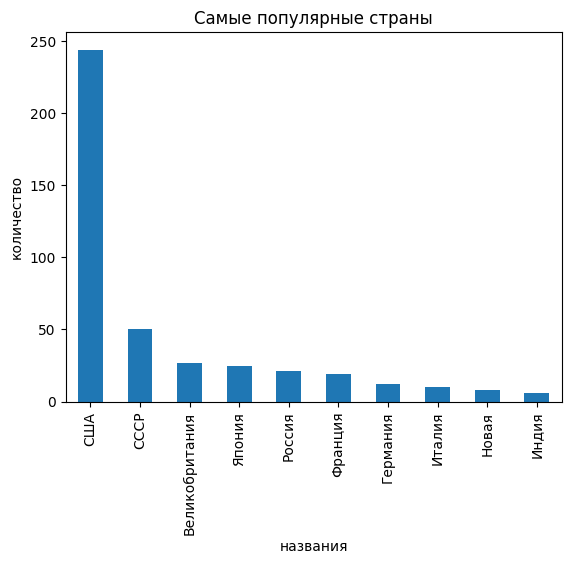

In [33]:
top_country.plot(kind='bar')
plt.xlabel('названия')
plt.ylabel('количество')
plt.title('Самые популярные страны')
plt.show()

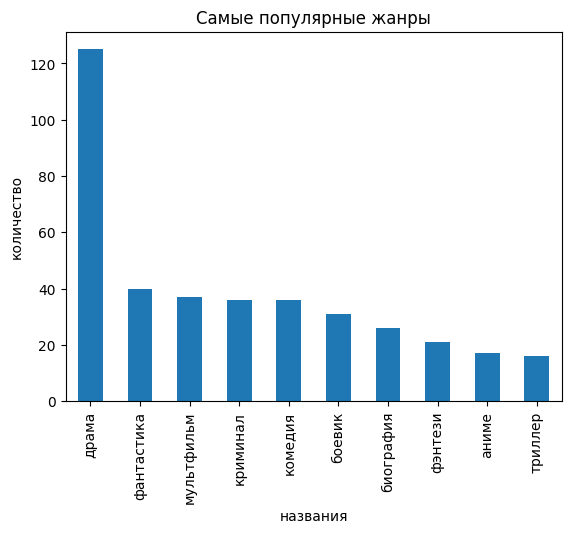

In [34]:
top_janr.plot(kind='bar')
plt.xlabel('названия')
plt.ylabel('количество')
plt.title('Самые популярные жанры')
plt.show()

In [36]:
merged_df

,name,country,janr
0,1+1,Франция,драма
1,Зеленая миля,США,драма
2,Форрест Гамп,США,драма
3,Побег из Шоушенка,США,драма
4,Унесённые призраками,Япония,аниме
...,...,...,...
543,Хладнокровный Люк,США,криминал
545,Это случилось однажды ночью,США,комедия
547,Танцующий с волками,США,приключения
548,"Париж, Техас",Франция,драма


In [45]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score , classification_report

In [48]:
selected_genres = ['драма', 'фантастика', 'мультфильм']
new_df = merged_df[merged_df['janr'].isin(selected_genres)]
new_df

,name,country,janr
0,1+1,Франция,драма
1,Зеленая миля,США,драма
2,Форрест Гамп,США,драма
3,Побег из Шоушенка,США,драма
5,Интерстеллар,США,фантастика
...,...,...,...
538,Битва за Алжир,Италия,драма
540,Сука-любовь,Мексика,драма
541,Ребекка,США,драма
542,Стальной гигант,США,мультфильм


In [49]:
df = new_df

X = df[['name', 'country']]
y = df['janr']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

all_countries = pd.concat([X_train['country'], X_test['country']], axis=0)

encoder = LabelEncoder()
encoder.fit(all_countries)
X_train_country = encoder.transform(X_train['country']).reshape(-1, 1)
X_test_country = encoder.transform(X_test['country']).reshape(-1, 1)

vectorizer = TfidfVectorizer()
X_train_title = vectorizer.fit_transform(X_train['name'])
X_test_title = vectorizer.transform(X_test['name'])

X_train_features = pd.concat([pd.DataFrame(X_train_title.toarray()), pd.DataFrame(X_train_country)], axis=1)
X_test_features = pd.concat([pd.DataFrame(X_test_title.toarray()), pd.DataFrame(X_test_country)], axis=1)

model = RandomForestClassifier(n_estimators=200, max_depth=20, random_state=42)
model.fit(X_train_features, y_train)

y_pred = model.predict(X_test_features)

accuracy = accuracy_score(y_test, y_pred)
print("точность:", accuracy)

print(classification_report(y_test, y_pred))

точность: 0.6585365853658537
              precision    recall  f1-score   support

       драма       0.63      1.00      0.77        24
  мультфильм       1.00      0.11      0.20         9
  фантастика       1.00      0.25      0.40         8

    accuracy                           0.66        41
   macro avg       0.88      0.45      0.46        41
weighted avg       0.78      0.66      0.58        41

